# Pandas 4

## John Wilson

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

### Problem 1

In [2]:
djia = pd.read_csv("DJIA.csv", header=0)
djia.index=pd.to_datetime(djia["DATE"],format="%Y-%m-%d")
djia=djia.drop("DATE",axis=1)
djia[djia["VALUE"]=='.']=np.nan
djia=djia.dropna()

### Problem 2

In [3]:
checks = pd.read_csv("paychecks.csv")
temp1 = len(checks.iloc[0::2])
temp2 = len(checks.iloc[1::2])
x=pd.date_range(start='3/13/2008', periods = temp1, freq='WOM-3FRI')
y=pd.date_range(start='3/13/2008', periods = temp2, freq='WOM-1FRI')
t = x.union(y)
checks["DATE"] = t
checks.index=checks["DATE"]

### Problem 4

In [4]:
fin = pd.read_csv("finances.csv",header=0)
fin.index=pd.period_range("1978-09",periods=len(fin),freq="Q-AUG")

### Problem 5


In [5]:
web = pd.read_csv("website_traffic.csv",header=0)
web["ENTER"]=pd.to_datetime(web["ENTER"])
web["LEAVE"]=pd.to_datetime(web["LEAVE"])
web["DURATION"] = web["LEAVE"] - web["ENTER"]

In [6]:
web["DURATION"].mean()

Timedelta('0 days 00:05:04.731647')

Above is found the mean visit time.

In [7]:
web1 = web.copy()
web1["VISIT"]=1
web1=web1.drop("DURATION",axis=1)

Below is found the hourly number of visits.

In [8]:
web1.resample("H",on="ENTER").sum()

,VISIT
ENTER,
2016-10-07 01:00:00,618
2016-10-07 02:00:00,655
2016-10-07 03:00:00,670
2016-10-07 04:00:00,632
2016-10-07 05:00:00,672
2016-10-07 06:00:00,602
2016-10-07 07:00:00,660
2016-10-07 08:00:00,650
2016-10-07 09:00:00,665


### Problem 6

In [9]:
djia["VALUE"] = pd.to_numeric(djia["VALUE"])

In [10]:
gain=djia.shift(-1)-djia
gain=gain.dropna()

In [11]:
gain.sort_values("VALUE",ascending=False).iloc[0]

VALUE    936.42
Name: 2008-10-10 00:00:00, dtype: float64

The day with the greatest gain was 10/10/2008

In [17]:
gain.sort_values("VALUE",ascending=False).iloc[-1]

VALUE   -777.68
Name: 2008-09-26 00:00:00, dtype: float64

The day with the largest loss was 09/26/2008

In [21]:
mgain=djia.resample("M").first()
mgain=mgain.shift(-1)-mgain
mgain=mgain.dropna()

In [19]:
mgain.sort_values("VALUE",ascending=False).iloc[0]

VALUE     1556.750000
ROL30      626.351000
ROL365      43.988384
EXP30      688.259237
EXP365      19.163880
Name: 2015-10-31 00:00:00, dtype: float64

The month with the most gain was October 2015

In [22]:
mgain.sort_values("VALUE",ascending=False).iloc[-1]

VALUE    -1539.850000
ROL30     -620.333333
ROL365      40.953616
EXP30     -763.180607
EXP365     -26.281647
Name: 2015-08-31 00:00:00, dtype: float64

The month with the greatest loss was August 2015

### Problem 7

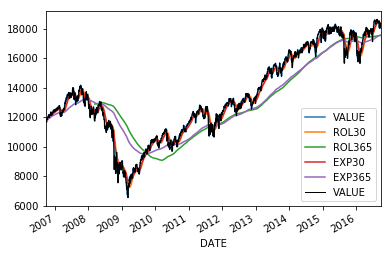

In [16]:
djia["ROL30"]=djia.rolling(30).mean().values
djia["ROL365"]=djia["VALUE"].rolling(365).mean().values
djia["EXP30"] = djia["VALUE"].ewm(span=30).mean().values
djia["EXP365"] = djia["VALUE"].ewm(span=365).mean().values

djia.plot()
plt.plot(djia["VALUE"],linewidth=1,color='k')
plt.legend(loc='lower right')
plt.show()